In [177]:
import csv
import pandas
from random import shuffle, randint
import matplotlib.pyplot as plt
from math import sin, cos, sqrt, atan2, radians, factorial

In [3]:
with open('cities.csv') as csvfile:
    spamreader = csv.reader(csvfile)
    #print(spamreader)
    for row in spamreader:
        #print(row[3])
        if 'United' in row[3]:
#            print(row)

['AE', '23.424076', '53.847818', 'United Arab Emirates']
['GB', '55.378051', '-3.435973', 'United Kingdom']


In [146]:
def transpose(A):
    return list(map(list,zip(*A)))

#Create roadmap
def roadmap(nodes=['United Kingdom','France','Germany','Italy','Spain','Egypt']):
    loc = []
    with open('cities.csv') as csvfile:
        spamreader = csv.reader(csvfile)
        for row in spamreader:
            if row[3] in nodes:
                loc.append([row[3],[float(row[1]),float(row[2])]])
    return loc
g = roadmap()
g2 = g[1:] + g[0:]

for i in range(len(g)):
    print(g[i],g2[i])

['Germany', [51.165691, 10.451526]] ['Egypt', [26.820553, 30.802498]]
['Egypt', [26.820553, 30.802498]] ['Spain', [40.463667, -3.74922]]
['Spain', [40.463667, -3.74922]] ['France', [46.227638, 2.213749]]
['France', [46.227638, 2.213749]] ['United Kingdom', [55.378051, -3.435973]]
['United Kingdom', [55.378051, -3.435973]] ['Italy', [41.87194, 12.56738]]
['Italy', [41.87194, 12.56738]] ['Germany', [51.165691, 10.451526]]


In [136]:
#paths is a dictionary in format {'name':[lat,lon]}
def path_dis(points,total=True):
    dis_tot = 0
    dis_list = []
    # approximate radius of earth in km
    R = 6373.0
    nxt_points = points[1:] + points[0:]
    for p1,p2 in zip(points,nxt_points):
        lat1 = radians(p1[1][0])
        lon1 = radians(p1[1][1])
        lat2 = radians(p2[1][0])
        lon2 = radians(p2[1][1])

        dlon = lon2 - lon1
        dlat = lat2 - lat1

        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))

        distance = R * c
        if total:
            dis_tot += distance
        else:
            dis_list.append([f'{p1[0]} -> {p2[0]}',distance])
    if total:
        return dis_tot
    else:
        return dis_list
path_dis(g,total=False)

[['Spain -> United Kingdom', 1659.0844024754726],
 ['United Kingdom -> Italy', 1898.645189152048],
 ['Italy -> Egypt', 2358.126467086112],
 ['Egypt -> Germany', 3205.5212434935584],
 ['Germany -> France', 816.0850771666999],
 ['France -> Spain', 801.7941174303226]]

In [176]:
def new_cyc(nodes):
    pem = list(range(1,len(nodes)))
    shuffle(pem)
    new_path = [nodes[0]]
    for j in pem:
        #print(nodes[i],j)
        new_path.append(nodes[j])
    if new_path[1:] == nodes[1:] or new_path == nodes[1:][::-1]:
        new_cyc(nodes)
    else:
        return new_path



([['Germany', [51.165691, 10.451526]],
  ['Egypt', [26.820553, 30.802498]],
  ['Spain', [40.463667, -3.74922]],
  ['France', [46.227638, 2.213749]],
  ['United Kingdom', [55.378051, -3.435973]],
  ['Italy', [41.87194, 12.56738]]],
 [['Germany', [51.165691, 10.451526]],
  ['Italy', [41.87194, 12.56738]],
  ['France', [46.227638, 2.213749]],
  ['Spain', [40.463667, -3.74922]],
  ['Egypt', [26.820553, 30.802498]],
  ['United Kingdom', [55.378051, -3.435973]]])

In [ ]:
class t_salesmen:
    def __init__(self, nodes=['United Kingdom','France','Germany','Italy','Spain','Egypt']):
    self.nodes = nodes
    self.num_nodes = len(nodes)
    self.distance = path_dis(roadmap())
    #self.min = path_dis(roadmap())
    def roadmap(self,nodes):
        loc = []
        with open('cities.csv') as csvfile:
            spamreader = csv.reader(csvfile)
            for row in spamreader:
                if row[3] in nodes:
                    loc.append([row[3],[float(row[1]),float(row[2])]])
        print(loc)

    def path_dis(self,points,total=True):
        dis_tot = 0
        dis_list = []
        # approximate radius of earth in km
        R = 6373.0
        nxt_points = points[1:] + points[0:]
        for p1,p2 in zip(points,nxt_points):
            lat1 = radians(p1[1][0])
            lon1 = radians(p1[1][1])
            lat2 = radians(p2[1][0])
            lon2 = radians(p2[1][1])

            dlon = lon2 - lon1
            dlat = lat2 - lat1

            a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
            c = 2 * atan2(sqrt(a), sqrt(1 - a))

            distance = R * c
            if total:
                dis_tot += distance
            else:
                dis_list.append([f'{p1[0]} -> {p2[0]}',distance])
        if total:
            return dis_tot
        else:
            return dis_list
    def new_cyc(nodes):
        pem = list(range(1,len(nodes)))
        shuffle(pem)
        new_path = [nodes[0]]
        for j in pem:
            #print(nodes[i],j)
            new_path.append(nodes[j])
        if new_path[1:] == nodes[1:] or new_path == nodes[1:][::-1]:
            new_cyc(nodes)
        else:
            return new_path
    def minimise(): 
        thresh = self.distance
        dis = self.distance + 1
        count = 1
        while count < math.factorial(num_nodes - 1)/4 or dis > thresh:
            dis = self.path_dis(self.new_cyc(nodes))
            count += 1
        return dis

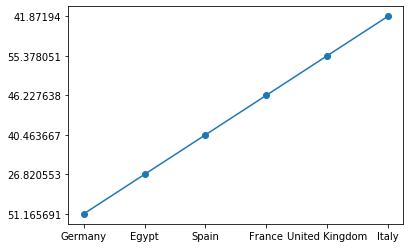

In [53]:


plt.plot(graph[3], graph[1], '-o')
plt.show()

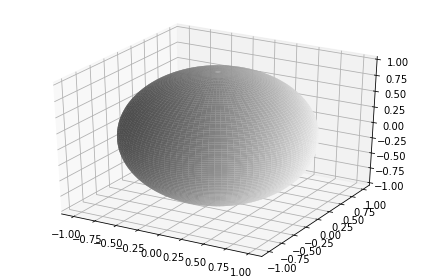

In [69]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create a sphere
r = 1
pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0.0:pi:100j, 0.0:2.0*pi:100j]
x = r*sin(phi)*cos(theta)
y = r*sin(phi)*sin(theta)
z = r*cos(phi)

#Import data
#data = np.genfromtxt('leb.txt')
#xx, yy, zz = np.hsplit(data, 3) 

#Set colours and render
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(
    x, y, z,  rstride=1, cstride=1, color='white')

#ax.scatter(xx,yy,zz,color="k",s=20)

# ax.set_xlim([-1,1])
# ax.set_ylim([-1,1])
# ax.set_zlim([-1,1])
#ax.set_aspect("equal")
plt.tight_layout()
plt.show()